<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.287579,93.201659,73.717321,69.330749,-0.000646,285.536663,285.537319,-0.000657
1,0.0,1.0,73.600363,97.219675,70.404173,75.735556,0.001841,326.961609,326.958343,0.003266
2,0.0,2.0,91.339962,89.587457,98.688189,63.990774,-0.004751,353.601630,353.605609,-0.003979
3,0.0,3.0,24.363394,66.545734,36.578584,36.434918,-0.000782,173.921849,173.928244,-0.006396
4,0.0,4.0,63.273703,80.654604,76.777429,93.864671,0.004315,324.574721,324.568979,0.005742
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,64.377897,43.745192,97.280042,56.721170,-0.000102,272.124199,272.128640,-0.004441
19996,999.0,16.0,92.798848,84.177846,20.415011,24.701017,-0.002240,232.090482,232.086504,0.003978
19997,999.0,17.0,21.404501,89.263965,90.484898,27.766027,0.004486,238.923876,238.924897,-0.001020
19998,999.0,18.0,26.858162,27.380943,58.075984,89.243482,0.047462,211.606033,211.568822,0.037210


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.287579,93.201659,73.717321,69.330749,-0.000646,285.536663,285.537319,-0.000657
1,0.0,1.0,73.600363,97.219675,70.404173,75.735556,0.001841,326.961609,326.958343,0.003266
2,0.0,2.0,91.339962,89.587457,98.688189,63.990774,-0.004751,353.601630,353.605609,-0.003979
3,0.0,3.0,24.363394,66.545734,36.578584,36.434918,-0.000782,173.921849,173.928244,-0.006396
4,0.0,4.0,63.273703,80.654604,76.777429,93.864671,0.004315,324.574721,324.568979,0.005742
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,64.377897,43.745192,97.280042,56.721170,-0.000102,272.124199,272.128640,-0.004441
19996,999.0,16.0,92.798848,84.177846,20.415011,24.701017,-0.002240,232.090482,232.086504,0.003978
19997,999.0,17.0,21.404501,89.263965,90.484898,27.766027,0.004486,238.923876,238.924897,-0.001020
19998,999.0,18.0,26.858162,27.380943,58.075984,89.243482,0.047462,211.606033,211.568822,0.037210


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.287579  93.201659  73.717321  69.330749 -0.000646  285.536663   
      1.0    73.600363  97.219675  70.404173  75.735556  0.001841  326.961609   
      2.0    91.339962  89.587457  98.688189  63.990774 -0.004751  353.601630   
      3.0    24.363394  66.545734  36.578584  36.434918 -0.000782  173.921849   
      4.0    63.273703  80.654604  76.777429  93.864671  0.004315  324.574721   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   64.377897  43.745192  97.280042  56.721170 -0.000102  272.124199   
      16.0   92.798848  84.177846  20.415011  24.701017 -0.002240  232.090482   
      17.0   21.404501  89.263965  90.484898  27.766027  0.004486  238.923876   
      18.0   26.858162  27.380943  58.075984  89.243482  0.047462  211.606033   
      19.0   86.616314  96.997351  29.227400  39.391150  0.005548  262.237764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    285.537319 -0.000657  
      1.0    326.958343  0.003266  
      2.0    353.605609 -0.003979  
      3.0    173.928244 -0.006396  
      4.0    324.568979  0.005742  
...                 ...       ...  
999.0 15.0   272.128640 -0.004441  
      16.0   232.086504  0.003978  
      17.0   238.924897 -0.001020  
      18.0   211.568822  0.037210  
      19.0   262.229741  0.008023  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.287579  93.201659  73.717321  69.330749 -0.000646  285.536663   
      1.0    73.600363  97.219675  70.404173  75.735556  0.001841  326.961609   
      2.0    91.339962  89.587457  98.688189  63.990774 -0.004751  353.601630   
      3.0    24.363394  66.545734  36.578584  36.434918 -0.000782  173.921849   
      4.0    63.273703  80.654604  76.777429  93.864671  0.004315  324.574721   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   64.377897  43.745192  97.280042  56.721170 -0.000102  272.124199   
      16.0   92.798848  84.177846  20.415011  24.701017 -0.002240  232.090482   
      17.0   21.404501  89.263965  90.484898  27.766027  0.004486  238.923876   
      18.0   26.858162  27.380943  58.075984  89.243482  0.047462  211.606033   
      19.0   86.616314  96.997351  29.227400  39.391150  0.005548  262.237764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    285.537319 -0.000657  
      1.0    326.958343  0.003266  
      2.0    353.605609 -0.003979  
      3.0    173.928244 -0.006396  
      4.0    324.568979  0.005742  
...                 ...       ...  
999.0 15.0   272.128640 -0.004441  
      16.0   232.086504  0.003978  
      17.0   238.924897 -0.001020  
      18.0   211.568822  0.037210  
      19.0   262.229741  0.008023  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.287579,93.201659,73.717321,69.330749,-0.000646,285.536663,285.537319,-0.000657
1,0.0,1.0,73.600363,97.219675,70.404173,75.735556,0.001841,326.961609,326.958343,0.003266
2,0.0,2.0,91.339962,89.587457,98.688189,63.990774,-0.004751,353.601630,353.605609,-0.003979
3,0.0,3.0,24.363394,66.545734,36.578584,36.434918,-0.000782,173.921849,173.928244,-0.006396
4,0.0,4.0,63.273703,80.654604,76.777429,93.864671,0.004315,324.574721,324.568979,0.005742
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,64.377897,43.745192,97.280042,56.721170,-0.000102,272.124199,272.128640,-0.004441
19996,999.0,16.0,92.798848,84.177846,20.415011,24.701017,-0.002240,232.090482,232.086504,0.003978
19997,999.0,17.0,21.404501,89.263965,90.484898,27.766027,0.004486,238.923876,238.924897,-0.001020
19998,999.0,18.0,26.858162,27.380943,58.075984,89.243482,0.047462,211.606033,211.568822,0.037210


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.287579  93.201659  73.717321  69.330749 -0.000646  285.536663   
      1.0    73.600363  97.219675  70.404173  75.735556  0.001841  326.961609   
      2.0    91.339962  89.587457  98.688189  63.990774 -0.004751  353.601630   
      3.0    24.363394  66.545734  36.578584  36.434918 -0.000782  173.921849   
      4.0    63.273703  80.654604  76.777429  93.864671  0.004315  324.574721   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   64.377897  43.745192  97.280042  56.721170 -0.000102  272.124199   
      16.0   92.798848  84.177846  20.415011  24.701017 -0.002240  232.090482   
      17.0   21.404501  89.263965  90.484898  27.766027  0.004486  238.923876   
      18.0   26.858162  27.380943  58.075984  89.243482  0.047462  211.606033   
      19.0   86.616314  96.997351  29.227400  39.391150  0.005548  262.237764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    285.537319 -0.000657  
      1.0    326.958343  0.003266  
      2.0    353.605609 -0.003979  
      3.0    173.928244 -0.006396  
      4.0    324.568979  0.005742  
...                 ...       ...  
999.0 15.0   272.128640 -0.004441  
      16.0   232.086504  0.003978  
      17.0   238.924897 -0.001020  
      18.0   211.568822  0.037210  
      19.0   262.229741  0.008023  

[20000 rows x 8 columns]

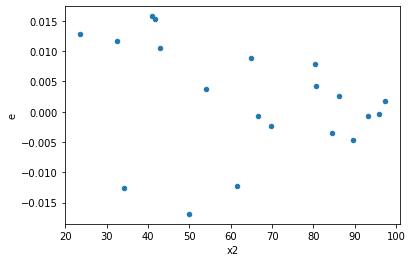

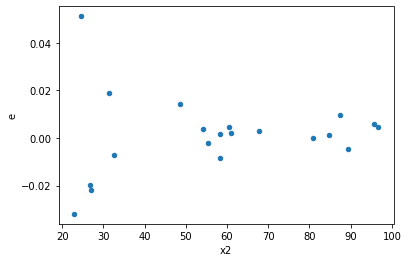

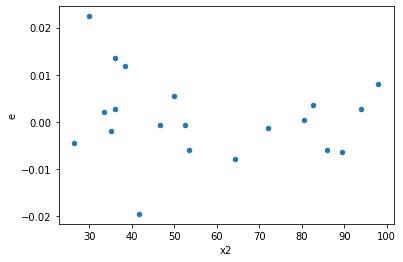

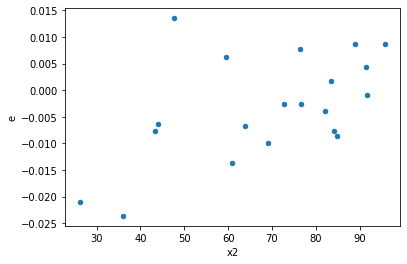

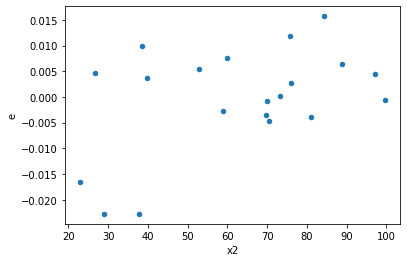

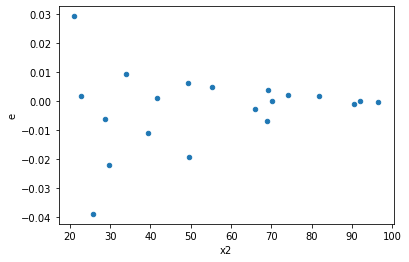

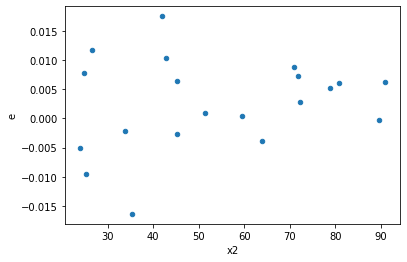

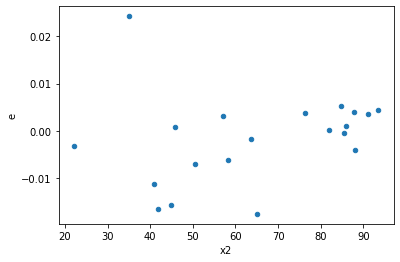

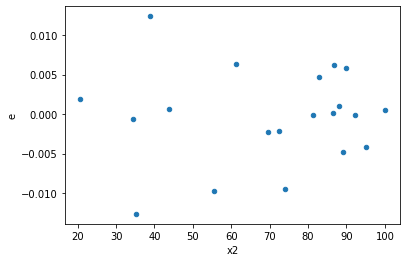

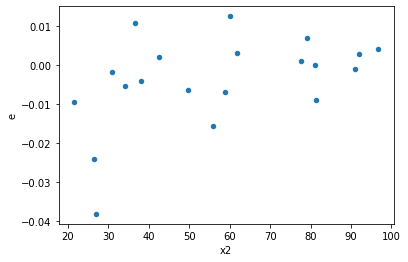

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]


    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,4.0,4.0,9.787663778526302e-05,0.00017267303695064294,2.4469159446315755e-05,4.3168259237660734e-05,1.7641905244996245,0.5958737281988042,0.7020631359005979,0.2979368640994021,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,4.53777867420297e-05,8.980606712029351e-05,1.1344446685507425e-05,2.2451516780073377e-05,1.9790755250104244,0.5247728212899219,0.7376135893550391,0.26238641064496093,Reject001=1 : Homoscedasticity
17.0,4.0,4.0,0.00016554396295100622,0.00020165820475653097,4.1385990737751554e-05,5.041455118913274e-05,1.2181549913494156,0.8529510258348352,0.5735244870825824,0.4264755129174176,Reject001=1 : Homoscedasticity
25.0,4.0,4.0,5.899864921173343e-05,0.00011270874369931042,1.4749662302933358e-05,2.8177185924827605e-05,1.91036142700188,0.5461026033111436,0.7269486983444282,0.2730513016555718,Reject001=1 : Homoscedasticity
52.0,4.0,4.0,9.636999835587029e-05,0.0001105104509397984,2.4092499588967572e-05,2.76276127349496e-05,1.1467308584120854,0.8976334013173539,0.551183299341323,0.44881670065867696,Reject001=1 : Homoscedasticity
56.0,4.0,4.0,2.426028696386433e-05,9.787657147570668e-05,6.065071740966083e-06,2.446914286892667e-05,4.034435850717418,0.2053801638813113,0.8973099180593443,0.10269008194065565,Reject001=1 : Homoscedasticity
61.0,4.0,4.0,0.0003131488398367021,0.0005067152467774835,7.828720995917552e-05,0.00012667881169437087,1.6181290885245512,0.652436539248527,0.6737817303757365,0.3262182696242635,Reject001=1 : Homoscedasticity
69.0,4.0,4.0,6.440984948415575e-05,0.00013420077515889216,1.6102462371038937e-05,3.355019378972304e-05,2.083544306246273,0.49460139287408955,0.7526993035629552,0.24730069643704478,Reject001=1 : Homoscedasticity
74.0,4.0,4.0,8.547075729990062e-05,0.00011903475142766904,2.1367689324975156e-05,2.975868785691726e-05,1.3926956445465757,0.7560263911117944,0.6219868044441028,0.3780131955558972,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.000777455561517198,5.74676202271767e-05,0.0001943638903792995,1.4366905056794176e-05,0.07391756271577649,0.027120934781012206,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,0.0023570255553382958,0.00010838713432687532,0.0005892563888345739,2.709678358171883e-05,0.045984709025065656,0.011256635223579135,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,0.0009377219049446858,0.00010452186534751433,0.00023443047623617145,2.6130466336878583e-05,0.11146360642356953,0.05630865606967066,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,0.00023563743211451886,0.00016494583066956574,5.8909358028629714e-05,4.1236457667391435e-05,0.6999984221072428,0.738040342631335,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,9.787663778526302e-05,0.00017267303695064294,2.4469159446315755e-05,4.3168259237660734e-05,1.7641905244996245,0.5958737281988042,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,0.001001096862642725,6.928932164220027e-05,0.00025027421566068124,1.7322330410550067e-05,0.06921340404492755,0.02405715777551539,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,0.00043873871470411993,4.603358325184896e-06,0.00010968467867602998,1.150839581296224e-06,0.01049225466298169,0.0006424009711711366,Reject001=0 : Heteroscedasticity
7.0,4.0,4.0,0.0002387814873643928,5.13698023468606e-05,5.96953718410982e-05,1.284245058671515e-05,0.215133103130678,0.16587154090267203,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,4.53777867420297e-05,8.980606712029351e-05,1.1344446685507425e-05,2.2451516780073377e-05,1.9790755250104244,0.5247728212899219,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      776
Reject001=0 : Heteroscedasticity    224
Name: Result_test, dtype: int64